## Importing Data

In [1]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
#reading in the data
df = pd.read_csv('Video Games Sales.csv') 
print(df.head())
#removing value (Actual) Column
print(df.columns)

### From a consumer standpoint video games are a source of entertainment that is paid for to provide certain amount of enjoyment, but from a sellers point of view video
### are a commodity to be sold to as many consumers as possible. From this position, it is important to read consumer interest in order to design the commodity that would
### attract the most purchases. Using the data given, I am trying to shine a glimpse of light on general trends of consumer interest with video games that may help
### influence future video game creations.


   index  Rank         Game Title Platform    Year     Genre Publisher  \
0      0     1         Wii Sports      Wii  2006.0    Sports  Nintendo   
1      1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo   
2      2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo   
3      3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo   
4      4     5             Tetris       GB  1989.0    Puzzle  Nintendo   

   North America  Europe  Japan  Rest of World  Global  Review  
0          40.43   28.39   3.77           8.54   81.12   76.28  
1          29.08    3.58   6.81           0.77   40.24   91.00  
2          14.50   12.22   3.63           3.21   33.55   82.07  
3          14.82   10.51   3.18           3.01   31.52   82.65  
4          23.20    2.26   4.22           0.58   30.26   88.00  
Index(['index', 'Rank', 'Game Title', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review'

In [2]:
#I want to show through graphs how genre and platform preferences change over the course of a couple of decades based on data about individual games' review
# rating and global sales. I want to find for each year bin how certain genres perform on avg. 
# points on y axis, year on x axis, each point represents genre, can link together as they go through time.

## Data cleaning

In [3]:

# dropping all rows with missing values
df = df.dropna()
# not interested in regional sales atm
df = df.drop(columns=['index','Rank','North America','Europe','Japan','Rest of World'])



## Feature Extraction

In [4]:
# creating  10 bins for Global sales and Reviews
# the higher the bin number the more global sales/better the review
df['Global_bins'] = pd.cut(df.Global, bins=10, labels=range(10))
df['Review_bins'] = pd.cut(df.Review, bins=10, labels=range(10))
#df['Yr_bins'] = pd.cut(df.Year, bins=10, labels=range(10))

In [ ]:
# returns a scoring out of 18 for a video games based on global sales and review.
def points(row):
    total = row.Global_bins + row.Review_bins
    return total

df['points'] = df.apply(points,axis=1)
print(df.head())

In [ ]:
#We are grouping the data by Year then by Genre to form the categories we want, then we average the points per category.
grouped_df = df.groupby(['Year', 'Genre'])['points'].mean().reset_index()
#Here we are transforming the found data into a grid to better represent the avg points for some Year and Genre.
pivot_df = grouped_df.pivot(index='Year', columns='Genre', values='points')
print(grouped_df.head())
print(pivot_df.head())


## Data Visualization

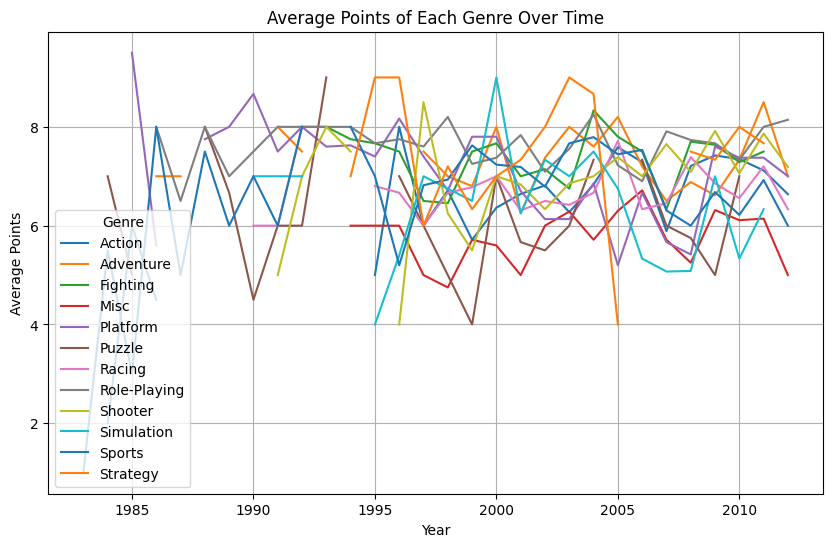

In [39]:
#Plotting the data we acquired and showcasing a visual of the avg points a Genre of video game earned over the years.
pivot_df.plot(figsize=(10,6))
plt.title('Average Points of Each Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Average Points')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

In [ ]:
#Through this data visualization project, I was able to employ multiple Pandas and Matplotlib techniques to come to a smart solution to determine the profitability of certain
#gaming genres over the years. Although this is not a prediction of the future, we can clearl see as the data approaches 2012, there is a clear trend towards Role-Playing
#games. While a lot of other video game genres seem to trend negatively. With this data one might be convinced to move towards designing RP video games as popularity and
#profitability dictate it is become a popular genre to play. 